# Green's Theorem

Green's Theorem is a special case of Stokes' Theorem where the surface is a plane.  The surface integral is then a double integral over the plane.  The line integral is a single integral over the boundary of the plane.  The two are related by the following equation:

$$\oint_C \vec{F} \cdot d\vec{r} = \iint_S \nabla \times \vec{F} \cdot d\vec{S}$$

where $C$ is the boundary of the surface $S$.

## Example 1

Evaluate the line integral $\oint_C \vec{F} \cdot d\vec{r}$ where $\vec{F} = \langle x^2, y^2 \rangle$ and $C$ is the circle $x^2 + y^2 = 1$.

## Solution

First, we need to parameterize the circle.  We can do this by letting $x = \cos t$ and $y = \sin t$ where $t$ ranges from $0$ to $2\pi$.  Then, we have

$$\oint_C \vec{F} \cdot d\vec{r} = \int_0^{2\pi} \langle \cos^2 t, \sin^2 t \rangle \cdot \langle -\sin t, \cos t \rangle dt = \int_0^{2\pi} \cos^2 t (-\sin t) + \sin^2 t \cos t dt$$

$$ = \left[ \frac{1}{3} \cos^3 t + \frac{1}{3} \sin^3 t \right]_0^{2\pi} = 0$$

## Example 2

Evaluate the line integral $\oint_C \vec{F} \cdot d\vec{r}$ where $\vec{F} = \langle y, x \rangle$ and $C$ is the circle $x^2 + y^2 = 1$.

## Solution

We can use the same parameterization as in the previous example.  Then, we have

$$\oint_C \vec{F} \cdot d\vec{r} = \int_0^{2\pi} \langle \sin t, \cos t \rangle \cdot \langle -\sin t, \cos t \rangle dt = \int_0^{2\pi} -\sin^2 t + \cos^2 t dt$$

$$ = \int_0^{2\pi} cos(2t) dt = \left[ -\frac{1}{2}sin(2t) \right]_0^{2\pi} = 0$$

# Simplified Green's Theorem

If we write the vector field $\vec{F}$ as $\vec{F} = \langle P, Q \rangle$, then we can write Green's Theorem as

$$\oint_C \vec{F} \cdot d\vec{r} = \iint_S \left( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right) dA$$

## Example 3

Evaluate the line integral $\oint_C \vec{F} \cdot d\vec{r}$ where $\vec{F} = \langle y^2, x^2 \rangle$ and $C$ is the circle $x^2 + y^2 = 1$.

## Solution

We can use the same parameterization as in the previous example.  Then, we have

$$\oint_C \vec{F} \cdot d\vec{r} = \int_0^{2\pi} \langle \sin^2 t, \cos^2 t \rangle \cdot \langle -\sin t, \cos t \rangle dt = \int_0^{2\pi} -\sin^3 t + \cos^3 t dt = 0$$

We can also use Green's Theorem to evaluate this integral.  First, we have

$$\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} = 2x - 2y$$

Then, we have

$$\iint_S \left( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right) dA = \int_{-1}^1 \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} 2x - 2y dy dx = 0$$

## Example 4

Evaluate the line integral $\oint_C \vec{F} \cdot d\vec{r}$ where $\vec{F} = \langle y^3, -x^3 \rangle$ and $C$ is the circle $x^2 + y^2 = 4$.

## Solution

We can use the same parameterization as in the previous example.  Then, we have

$$\oint_C \vec{F} \cdot d\vec{r} = \int_0^{2\pi} \langle 8\sin^3 t, -8\cos^3 t \rangle \cdot \langle -2\sin t, 2\cos t \rangle dt = \int_0^{2\pi} -16\sin^4 t - 16\cos^4 t dt = -24\pi$$

We can also use Green's Theorem to evaluate this integral.  First, we have

$$\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} = -3x^2 - (-3y^2) = -3(x^2 + y^2)$$

Then, we have

$$\iint_S \left( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right) dA = -3 \iint_S (x^2+y^2)dA$$

$$ = -3 \int_{0}^{2\pi} \int_{0}^{2} r^3 dr d\theta = -3 \int_{0}^{2\pi} \left[ \frac{r^4}{4} \right]_0^2 d\theta = -24\pi$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

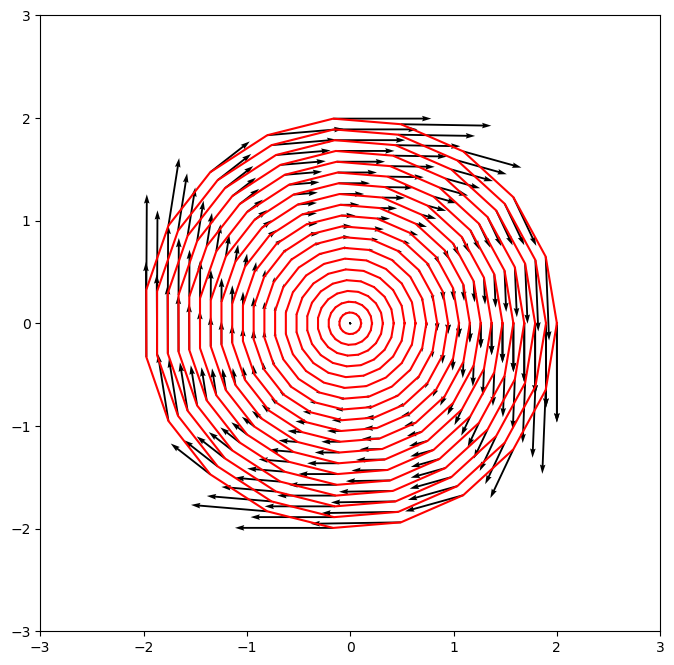

In [2]:
# Define the vector field

npts_theta = 20
npts_r = 20

circle_radius = 2

def F(x,y):
    return np.array([y**3, -x**3])

# Define the circle
t = np.linspace(0,2*np.pi,npts_theta)
r = np.linspace(0,circle_radius,npts_r)

radius, theta = np.meshgrid(r,t)

x = radius*np.cos(theta)
y = radius*np.sin(theta)

# plot the circle
plt.figure(figsize=(8,8))
plt.plot(x,y,'r')

# plot the vector field
plt.quiver(x,y,F(x,y)[0],F(x,y)[1],scale=50)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()


In [3]:
# Evaluate the integral using Green's Theorem

def dQdx(x,y):
    return -3*x**2

def dPdy(x,y):
    return 3*y**2

integrand = dQdx(x,y) - dPdy(x,y)

rdrd0 = radius*np.ones((npts_theta,npts_r))*(circle_radius/npts_r)*(2*np.pi/npts_theta)

integral = np.sum(integrand*rdrd0)

print(integral/np.pi)



-25.263157894736842


In [4]:
# Evaluate the integral using the line integral

def r(t):
    return np.array([circle_radius*np.cos(t),circle_radius*np.sin(t)])

def drdt(t):
    return np.array([-circle_radius*np.sin(t),circle_radius*np.cos(t)])

Fr = F(r(t)[0],r(t)[1])
dr = drdt(t)

# calculate the F.dr vector
Fdr = np.sum(Fr*dr, axis=1)

# Calculate the line integral
W = np.trapz(Fdr, t)*circle_radius/(npts_theta)
    
print(W/np.pi)

-24.400000000000002


In [5]:
# Evaluate the integral of F over the boundary of the surface
t = np.linspace(0, 2*np.pi, npts_theta)

integral = np.sum(F(circle_radius*np.cos(t), circle_radius*np.sin(t))*drdt(t))*2*np.pi/npts_theta

print(integral/np.pi)

-24.400000000000002
